I originally got into Python through geospatial analysis, and believe it is one of the most fascinating applications of data science out there today. In this notebook, I will introduce some basic fundamentals of geospatial data manipulation, analysis, and visualization! I hope this will prove to be an accessible introduction to open source Python development for geospatial applications. 

Here, I will cover the basics of importing and exploring shapefiles and other spatial data formats in Geopandas, simple joins and spatial analysis, and introduce plotting figures in matplotlb. In this example, we will take two basic shapefiles of US Major Cities as points and US Counties as polygons, and sum up the total proportion of urban population per county.

In [1]:
import pandas as pd
import geopandas as gpd
from requests import request
import matplotlib.pyplot as plt

%matplotlib inline

Let's read in our locally stored major_cities shapefile directly through Geopandas:

In [2]:
cities_gdf = gpd.read_file(r'../data/major_cities/major_cities.shp')
# counties_gdf = gpd.read_file(r'../data/counties/us_counties.shp')

First we will check out the first 10 rows of the cities Geodataframe to see what we are working with. We will also look at the coordinate reference information:

In [3]:
cities_gdf.head(10)

FID           NAME CLASS  ST STFIPS PLACEFIPS CAPITAL  POP_CLASS  \
0    1          Ammon  city  ID     16   1601990    None          6   
1    2      Blackfoot  city  ID     16   1607840    None          6   
2    3     Boise City  city  ID     16   1608830   State          8   
3    4         Burley  city  ID     16   1611260    None          6   
4    5       Caldwell  city  ID     16   1612250    None          7   
5    6       Chubbuck  city  ID     16   1614680    None          6   
6    7  Coeur d'Alene  city  ID     16   1616750    None          7   
7    8          Eagle  city  ID     16   1623410    None          6   
8    9    Garden City  city  ID     16   1629620    None          6   
9   10         Hayden  city  ID     16   1636370    None          6   

   POPULATION  POP2010  ...  MARHH_NO_C  MHH_CHILD  FHH_CHILD  FAMILIES  \
0       15181    13816  ...        1131        106        335      3352   
1       11946    11899  ...        1081        174        381      2958   
2      225405   205671  ...       21233       2414       5919     50647   
3       10727    10345  ...         861        139        358      2499   
4       53942    46237  ...        3113        686       1755     10776   
5       14655    13922  ...        1281        172        370      3586   
6       50469    44137  ...        4517        638       1524     10813   
7       25825    19908  ...        2450        165        398      5585   
8       12172    10972  ...        1390        140        372      2849   
9       14759    13294  ...        1641        165        315      3645   

   AVE_FAM_SZ  HSE_UNITS  VACANT  OWNER_OCC  RENTER_OCC  \
0        3.61       4747     271       3205        1271   
1        3.31       4547     318       2788        1441   
2        2.97      92700    6996      52345       33359   
3        3.37       3885     241       2183        1461   
4        3.51      16323    1428       9699        5196   
5        3.40       4961     229       3324        1408   
6        2.92      20219    1824      10365        8030   
7        3.20       7570     501       5770        1299   
8        2.81       5429     551       3042        1836   
9        3.01       5563     351       3839        1373   

                      geometry  
0  POINT (-111.95410 43.47579)  
1  POINT (-112.34557 43.19394)  
2  POINT (-116.23011 43.59901)  
3  POINT (-113.79329 42.53674)  
4  POINT (-116.68562 43.66163)  
5  POINT (-112.46956 42.92275)  
6  POINT (-116.79315 47.70459)  
7  POINT (-116.35088 43.69469)  
8  POINT (-116.29340 43.66470)  
9  POINT (-116.80112 47.76856)  

[10 rows x 50 columns]

Looks like we can't view all of the columns at once. Let's see what we columns we have available to us:

In [4]:
print(cities_gdf.columns)

Index(['FID', 'NAME', 'CLASS', 'ST', 'STFIPS', 'PLACEFIPS', 'CAPITAL',
       'POP_CLASS', 'POPULATION', 'POP2010', 'WHITE', 'BLACK', 'AMERI_ES',
       'ASIAN', 'HAWN_PI', 'HISPANIC', 'OTHER', 'MULT_RACE', 'MALES',
       'FEMALES', 'AGE_UNDER5', 'AGE_5_9', 'AGE_10_14', 'AGE_15_19',
       'AGE_20_24', 'AGE_25_34', 'AGE_35_44', 'AGE_45_54', 'AGE_55_64',
       'AGE_65_74', 'AGE_75_84', 'AGE_85_UP', 'MED_AGE', 'MED_AGE_M',
       'MED_AGE_F', 'HOUSEHOLDS', 'AVE_HH_SZ', 'HSEHLD_1_M', 'HSEHLD_1_F',
       'MARHH_CHD', 'MARHH_NO_C', 'MHH_CHILD', 'FHH_CHILD', 'FAMILIES',
       'AVE_FAM_SZ', 'HSE_UNITS', 'VACANT', 'OWNER_OCC', 'RENTER_OCC',
       'geometry'],
      dtype='object')


For this project, we really only need name and population. Let's filter out all the other columns by filtering it with a list of column names. We can also rename them to regular case so it doesn't SHOUT AT  US...

In [5]:
cities_gdf = cities_gdf[['NAME', 
                         'POPULATION',
                         'STFIPS',
                         'geometry']]
cities_gdf.columns = ['Name', 'Population','STFIPS', 'geometry']
cities_gdf

Name  Population STFIPS                     geometry
0                Ammon       15181     16  POINT (-111.95410 43.47579)
1            Blackfoot       11946     16  POINT (-112.34557 43.19394)
2           Boise City      225405     16  POINT (-116.23011 43.59901)
3               Burley       10727     16  POINT (-113.79329 42.53674)
4             Caldwell       53942     16  POINT (-116.68562 43.66163)
...                ...         ...    ...                          ...
3881           Herndon       23993     51   POINT (-77.38672 38.96993)
3882  Highland Springs       16618     51   POINT (-77.32854 37.55172)
3883           Hollins       15033     51   POINT (-79.95348 37.34338)
3884          Hopewell       22935     51   POINT (-77.29837 37.29038)
3885        Huntington       13120     51   POINT (-77.07409 38.79139)

[3886 rows x 4 columns]

For the counties layer it is too large to store on Github freely. Instead, we'll cover some basic Python requests by accessing the US Census Bureau's REST API endpoint. First, we will set up our base REST endpoint URL and specify a chunking size, to limit the file size sent through each call.

In [6]:
base_url = 'https://tigerweb.geo.census.gov/arcgis/rest/services/Census2010/State_County/MapServer/1/'

Next, we make a simple HTTP request to get the total number of features in this layer:

In [7]:
from math import ceil

oid_url = base_url +'query?where=oid>0&returnGeometry=false&returnIdsOnly=true&f=json'

response = request(method='GET',
                   url=oid_url)

assert response.ok
num_features = len(response.json()['objectIds'])
max_features = ceil(num_features / 100) * 100
print("Total number of features in this dataset: {0}".format(num_features))

Total number of features in this dataset: 3234


Next, we will make a number of subsequent API calls to get each county's relevant information in chunks. Each response is a collection of geojson features, which we temporarily store in geojson_features_list. Afterwards, we create the counties_gdf by using the from_features operator. Note: This may take a few minutes depending on your internet connection.

In [8]:
chunk_size = 100
geojson_features_list = []

i = 0
while i <= max_features:
    oid_min = i
    oid_max = i + chunk_size
    new_url = base_url + 'query?&where=objectid>={0}+and+objectid<={1}&outFields=GEOID,NAME&f=geojson'.format(oid_min, 
                                                                                         oid_max)
    response = request(method='GET', 
                       url=new_url)
    assert response.ok
    
    features = response.json()['features']
    geojson_features_list += features
    i += chunk_size
    print("Successfully returned OIDs {0}:{1}".format(oid_min,
                                                      oid_max))

#We are hard coding in the EPSG:3857 WGS coordinate reference system here. 
counties_gdf = gpd.GeoDataFrame.from_features(geojson_features_list, 
                                             crs='epsg:4326')
del geojson_features_list

Successfully returned OIDs 0:100
Successfully returned OIDs 100:200
Successfully returned OIDs 200:300
Successfully returned OIDs 300:400
Successfully returned OIDs 400:500
Successfully returned OIDs 500:600
Successfully returned OIDs 600:700
Successfully returned OIDs 700:800
Successfully returned OIDs 800:900
Successfully returned OIDs 900:1000
Successfully returned OIDs 1000:1100
Successfully returned OIDs 1100:1200
Successfully returned OIDs 1200:1300
Successfully returned OIDs 1300:1400
Successfully returned OIDs 1400:1500
Successfully returned OIDs 1500:1600
Successfully returned OIDs 1600:1700
Successfully returned OIDs 1700:1800
Successfully returned OIDs 1800:1900
Successfully returned OIDs 1900:2000
Successfully returned OIDs 2000:2100
Successfully returned OIDs 2100:2200
Successfully returned OIDs 2200:2300
Successfully returned OIDs 2300:2400
Successfully returned OIDs 2400:2500
Successfully returned OIDs 2500:2600
Successfully returned OIDs 2600:2700
Successfully returned 

Let's take a look at what we have now, shall we!

In [9]:
counties_gdf.head(10)

geometry  GEOID  \
0  MULTIPOLYGON (((-159.02859 56.66942, -159.0285...  02013   
1  MULTIPOLYGON (((-175.91304 51.80035, -175.9023...  02016   
2  POLYGON ((-90.13476 34.22603, -90.13477 34.225...  28107   
3  POLYGON ((-89.13497 32.57697, -89.13714 32.576...  28101   
4  POLYGON ((-90.59062 33.98690, -90.58851 33.986...  28027   
5  MULTIPOLYGON (((-91.47178 32.43948, -91.47177 ...  22065   
6  POLYGON ((-78.47071 38.04872, -78.47082 38.048...  51540   
7  POLYGON ((-77.06247 38.79496, -77.06129 38.794...  51510   
8  POLYGON ((-79.36681 37.72722, -79.36668 37.726...  51530   
9  POLYGON ((-77.31427 38.86700, -77.31476 38.867...  51600   

                         NAME  
0      Aleutians East Borough  
1  Aleutians West Census Area  
2               Panola County  
3               Newton County  
4              Coahoma County  
5              Madison Parish  
6        Charlottesville city  
7             Alexandria city  
8            Buena Vista city  
9                Fairfax city

Next, we will make sure the coordinate reference systems are the same:

In [10]:
print(cities_gdf.crs)
print(counties_gdf.crs)

epsg:4326
epsg:4326


Looks like they are the same, however if you wanted to convert between coordinate systems it's quite simple in Geopandas. Here's a redundant example:

In [11]:
counties_gdf = counties_gdf.to_crs('epsg:4326')
print(counties_gdf.crs)

epsg:4326


Next we'll move onto plotting. Geopandas ties in seamlessly with matplotlib, an industry standard scientific Python plotting library. Here, we will take the extents of the cities Geodataframe and plot them overlaid on county borders

(9.582718559000053, 74.86927542300003)

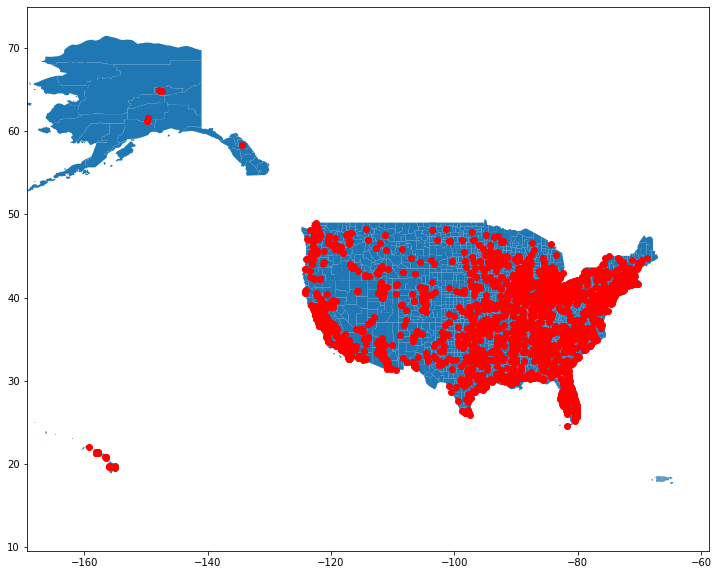

In [12]:
fig, ax = plt.subplots(figsize=(20,10))

xmin, ymin, xmax, ymax = cities_gdf.total_bounds

counties_gdf.plot(ax=ax)
cities_gdf.plot(ax=ax, 
                color='r')

ax.set_xlim(xmin - 10, xmax+ 10)
ax.set_ylim(ymin - 10, ymax + 10)

For these purposes, let's first filter to use only the 50 states that ESRI supplied (sorry, American Samoa, Guam, Northern Mariana Islands, Puerto Rico, and Virgin Islands...).

We know as geographers that a GEOID field is compromised of 5 digits--the first two corresponding to State and the last three corresponding to the County code. Let's make a new STATEFP field for the counties Geodataframe, and filter out the unwanted territories:

In [13]:
exclude_fips_list = ['60', '66', '69', '72', '79']

counties_gdf['STATEFP'] = counties_gdf['GEOID'].str.slice(0,2,1)

counties_gdf = counties_gdf[~counties_gdf['STATEFP'].isin(exclude_fips_list)]

Back to the issue at  hand--percent urban population per county (according to this data, at least). We have 2010 population by each city from the ESRI shapefile, however it look's like we're missing population totals on the counties shapefile. Not to fret! I downloaded the population csv from the US Census Bureau as well. We will have to read this in through regular Pandas since it is not a spatial data format.

First, we'll read in the csv and take a look at it's contents:

In [14]:
counties_pop_df = pd.read_csv(r'../data/population_tables/county_population.csv', 
            encoding='latin-1')
counties_pop_df.head(10)

SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME          CTYNAME  \
0      40       3         6      1       0  Alabama          Alabama   
1      50       3         6      1       1  Alabama   Autauga County   
2      50       3         6      1       3  Alabama   Baldwin County   
3      50       3         6      1       5  Alabama   Barbour County   
4      50       3         6      1       7  Alabama      Bibb County   
5      50       3         6      1       9  Alabama    Blount County   
6      50       3         6      1      11  Alabama   Bullock County   
7      50       3         6      1      13  Alabama    Butler County   
8      50       3         6      1      15  Alabama   Calhoun County   
9      50       3         6      1      17  Alabama  Chambers County   

   CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  ...  RDOMESTICMIG2019  \
0        4779736            4780125          4785437  ...          1.917501   
1          54571              54597            54773  ...          4.847310   
2         182265             182265           183112  ...         24.017829   
3          27457              27455            27327  ...         -5.690302   
4          22915              22915            22870  ...          1.385134   
5          57322              57322            57376  ...          1.020788   
6          10914              10911            10876  ...         -7.102343   
7          20947              20940            20932  ...         -7.216152   
8         118572             118526           118408  ...         -4.167837   
9          34215              34169            34122  ...         -7.927723   

   RNETMIG2011  RNETMIG2012  RNETMIG2013  RNETMIG2014  RNETMIG2015  \
0     0.578434     1.186314     1.522549     0.563489     0.626357   
1     6.018182    -6.226119    -3.902226     1.970443    -1.712875   
2    16.641870    17.488579    22.751474    20.184334    17.725964   
3     0.292676    -6.897817    -8.132185    -5.140431   -15.724575   
4    -4.998356    -3.787545    -5.797999     1.331144     1.329817   
5     0.208812    -1.650165    -0.347225    -2.049590    -1.338525   
6   -21.994339    -6.954560    -6.334200     9.617198   -24.592888   
7    -3.636538    -7.896764   -14.478623     0.442445    -6.223913   
8    -6.148582    -4.588523    -5.255477    -4.027747    -3.215406   
9    -1.379209     4.490952     2.520405    -3.787656     1.324055   

   RNETMIG2016  RNETMIG2017  RNETMIG2018  RNETMIG2019  
0     0.745172     1.090366     1.773786     2.483744  
1     4.777171     0.849656     0.540916     4.560062  
2    21.279291    22.398256    24.727215    24.380567  
3   -18.238016   -24.998528    -8.754922    -5.165664  
4    -0.708717    -3.234669    -6.857092     1.831952  
5    -1.391062     6.193562    -0.069229     1.124597  
6    -2.212709   -19.936786    -1.474201    -7.200986  
7    -6.272714    -4.962406   -10.071105    -6.294941  
8    -3.471589    -1.654454    -0.488995    -4.044995  
9    -5.786747     2.134851    -1.515444    -7.748227  

[10 rows x 164 columns]

This should be starting to look like a more typical GIS workflow now. In order to join the Census Population table to the county geometries, we must find a key field to join by. In this case, we already know GEOID is the name of the game in America.

In [15]:
counties_gdf[counties_gdf['GEOID']=='31039']

geometry  GEOID           NAME  \
1024  POLYGON ((-96.67131 41.74231, -96.66933 41.742...  31039  Cuming County   

     STATEFP  
1024      31

Upon closer inspection of the population dataframe, we can piece a GEOID column together accordingly:

In [16]:
counties_pop_df[counties_pop_df['CTYNAME']=='Cuming County'][['CTYNAME', 'STATE', 'COUNTY']]

CTYNAME  STATE  COUNTY
1701  Cuming County     31      39

With a little formatting, we can create this GEOID field in just a couple lines of code:

In [17]:
#Using a lambda function to add leading 0's to the county and state FIPS codes:
counties_pop_df['COUNTYFP'] = counties_pop_df.apply(lambda x: '{:0>3}'.format(int(x['COUNTY'])), 
                                                    axis=1)
counties_pop_df['STATEFP'] = counties_pop_df.apply(lambda x: '{:0>2}'.format(int(x['STATE'])), 
                                                   axis=1)

#Combining the two to create the 5 digit GEOID string field:
counties_pop_df['GEOID'] = counties_pop_df['STATEFP'] + counties_pop_df['COUNTYFP']
counties_pop_df = counties_pop_df[['CTYNAME', 'STNAME', 'CENSUS2010POP', 'GEOID']]
counties_pop_df

CTYNAME   STNAME  CENSUS2010POP  GEOID
0               Alabama  Alabama        4779736  01000
1        Autauga County  Alabama          54571  01001
2        Baldwin County  Alabama         182265  01003
3        Barbour County  Alabama          27457  01005
4           Bibb County  Alabama          22915  01007
...                 ...      ...            ...    ...
3188  Sweetwater County  Wyoming          43806  56037
3189       Teton County  Wyoming          21294  56039
3190       Uinta County  Wyoming          21118  56041
3191    Washakie County  Wyoming           8533  56043
3192      Weston County  Wyoming           7208  56045

[3193 rows x 4 columns]

Now that we're all set, lets do a join. Pandas makes this ridiculously easy through the Merge function, and if we keep the Geodataframe on the left of the merge function we preserve the Geodataframe type as well:

In [18]:
counties_gdf = counties_gdf.merge(counties_pop_df,
                   on='GEOID')

counties_gdf.head(10)

geometry  GEOID  \
0  MULTIPOLYGON (((-159.02859 56.66942, -159.0285...  02013   
1  MULTIPOLYGON (((-175.91304 51.80035, -175.9023...  02016   
2  POLYGON ((-90.13476 34.22603, -90.13477 34.225...  28107   
3  POLYGON ((-89.13497 32.57697, -89.13714 32.576...  28101   
4  POLYGON ((-90.59062 33.98690, -90.58851 33.986...  28027   
5  MULTIPOLYGON (((-91.47178 32.43948, -91.47177 ...  22065   
6  POLYGON ((-78.47071 38.04872, -78.47082 38.048...  51540   
7  POLYGON ((-77.06247 38.79496, -77.06129 38.794...  51510   
8  POLYGON ((-79.36681 37.72722, -79.36668 37.726...  51530   
9  POLYGON ((-77.31427 38.86700, -77.31476 38.867...  51600   

                         NAME STATEFP                     CTYNAME  \
0      Aleutians East Borough      02      Aleutians East Borough   
1  Aleutians West Census Area      02  Aleutians West Census Area   
2               Panola County      28               Panola County   
3               Newton County      28               Newton County   
4              Coahoma County      28              Coahoma County   
5              Madison Parish      22              Madison Parish   
6        Charlottesville city      51        Charlottesville city   
7             Alexandria city      51             Alexandria city   
8            Buena Vista city      51            Buena Vista city   
9                Fairfax city      51                Fairfax city   

        STNAME  CENSUS2010POP  
0       Alaska           3141  
1       Alaska           5561  
2  Mississippi          34707  
3  Mississippi          21720  
4  Mississippi          26151  
5    Louisiana          12093  
6     Virginia          43475  
7     Virginia         139966  
8     Virginia           6650  
9     Virginia          22565

Let's next take a visual look at what we just accomplished, since we all like maps. In this case, it's difficult to show AK and HI's extents in the same view as the contiguous US. Don't worry, I'll demonstrate subplotting later on with something a bit more complex on the state-by-state level.

(19.55649238100004, 53.95020929200006)

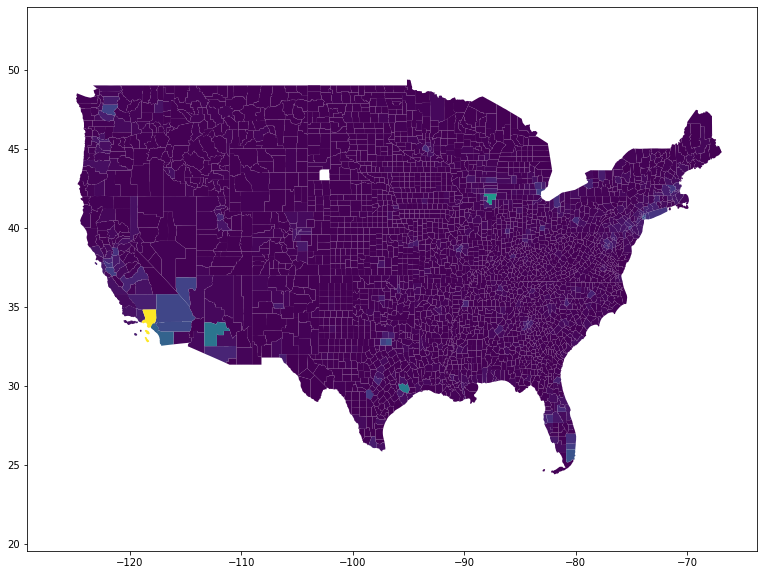

In [19]:
fig, ax = plt.subplots(figsize=(20,10))

#AK/HI fips list:
ak_hi_list = ['02', '15']
xmin, ymin, xmax, ymax = cities_gdf[~cities_gdf['STFIPS'].isin(ak_hi_list)].total_bounds

counties_gdf.plot(ax=ax,column='CENSUS2010POP')

ax.set_xlim(xmin - 5, xmax+ 5)
ax.set_ylim(ymin - 5, ymax + 5)

Now, we can filter the unwanted columns for ease of readability:

In [20]:
counties_gdf = counties_gdf[['NAME',
                             'CENSUS2010POP',
                             'GEOID',
                             'STATEFP',
                             'geometry']]
counties_gdf

NAME  CENSUS2010POP  GEOID STATEFP  \
0         Aleutians East Borough           3141  02013      02   
1     Aleutians West Census Area           5561  02016      02   
2                  Panola County          34707  28107      28   
3                  Newton County          21720  28101      28   
4                 Coahoma County          26151  28027      28   
...                          ...            ...    ...     ...   
3165            Granville County          59916  37077      37   
3166             McDowell County          44996  37111      37   
3167                 Cass County          28567  27021      27   
3168              Hubbard County          20428  27057      27   
3169               Winona County          51461  27169      27   

                                               geometry  
0     MULTIPOLYGON (((-159.02859 56.66942, -159.0285...  
1     MULTIPOLYGON (((-175.91304 51.80035, -175.9023...  
2     POLYGON ((-90.13476 34.22603, -90.13477 34.225...  
3     POLYGON ((-89.13497 32.57697, -89.13714 32.576...  
4     POLYGON ((-90.59062 33.98690, -90.58851 33.986...  
...                                                 ...  
3165  POLYGON ((-78.80329 36.17716, -78.80351 36.167...  
3166  POLYGON ((-81.86107 35.69329, -81.86117 35.693...  
3167  POLYGON ((-94.65939 46.89070, -94.65938 46.890...  
3168  POLYGON ((-95.16917 47.15251, -95.16917 47.152...  
3169  POLYGON ((-92.07904 43.95532, -92.07900 43.955...  

[3170 rows x 5 columns]

Now to do a spatial join between the cities geodataframe and the counties geodataframe. In this case, it will result in a geodataframe for each city point that was matched within a county polygon:

In [21]:
join_gdf = gpd.sjoin(cities_gdf, 
                     counties_gdf, 
                     how='left')
join_gdf

Name  Population STFIPS                     geometry  \
0                Ammon       15181     16  POINT (-111.95410 43.47579)   
1            Blackfoot       11946     16  POINT (-112.34557 43.19394)   
2           Boise City      225405     16  POINT (-116.23011 43.59901)   
3               Burley       10727     16  POINT (-113.79329 42.53674)   
4             Caldwell       53942     16  POINT (-116.68562 43.66163)   
...                ...         ...    ...                          ...   
3881           Herndon       23993     51   POINT (-77.38672 38.96993)   
3882  Highland Springs       16618     51   POINT (-77.32854 37.55172)   
3883           Hollins       15033     51   POINT (-79.95348 37.34338)   
3884          Hopewell       22935     51   POINT (-77.29837 37.29038)   
3885        Huntington       13120     51   POINT (-77.07409 38.79139)   

      index_right               NAME  CENSUS2010POP  GEOID STATEFP  
0            1939  Bonneville County         104234  16019      16  
1            2361     Bingham County          45607  16011      16  
2            2353         Ada County         392365  16001      16  
3            2356      Cassia County          22952  16031      16  
4            1902      Canyon County         188923  16027      16  
...           ...                ...            ...    ...     ...  
3881         1804     Fairfax County        1081726  51059      51  
3882         2875     Henrico County         306935  51087      51  
3883         1851     Roanoke County          92376  51161      51  
3884         2880      Hopewell city          22591  51670      51  
3885         1804     Fairfax County        1081726  51059      51  

[3959 rows x 9 columns]

Now that we have the matching GEOID for each city point, we can re-join the _city's_ population field back into the county geodataframe. Here, we group the joined geodataframe by GEOID and sum up each city's population. Note, the resulting data type is a Series, which is in essence a slice of a dataframe.

In [22]:
counties_urban_pop = join_gdf.groupby('GEOID')['Population'].sum()
print(type(counties_urban_pop))
counties_urban_pop

<class 'pandas.core.series.Series'>


GEOID
01001    34942
01003    72636
01005    13144
01015    66859
01031    28271
         ...  
56025    61295
56033    18441
56037    36372
56039     9674
56041    12473
Name: Population, Length: 1218, dtype: int64

Now we can merge the city population back into the counties geodataframe. We then can calculate percent urban population for each county. Note, not all counties in the original county shapefile have matching city points within them, so the shape of this geodataframe does not exactly match the original. 

In [23]:
counties_urban_gdf = counties_gdf.merge(counties_urban_pop, 
                                        on='GEOID')

counties_urban_gdf['Percent Urban Population'] = (counties_urban_gdf['Population'] / counties_urban_gdf['CENSUS2010POP']) * 100
counties_urban_gdf

NAME  CENSUS2010POP  GEOID STATEFP  \
0           Coahoma County          26151  28027      28   
1     Charlottesville city          43475  51540      51   
2          Alexandria city         139966  51510      51   
3             Fairfax city          22565  51600      51   
4            Dallas County        2368139  48113      48   
...                    ...            ...    ...     ...   
1228       Freeborn County          31255  27047      27   
1229     Rockingham County          93643  37157      37   
1230         Dakota County         398552  27037      27   
1231         Carver County          91042  27019      27   
1232         Winona County          51461  27169      27   

                                               geometry  Population  \
0     POLYGON ((-90.59062 33.98690, -90.58851 33.986...       16688   
1     POLYGON ((-78.47071 38.04872, -78.47082 38.048...       47754   
2     POLYGON ((-77.06247 38.79496, -77.06129 38.794...      152422   
3     POLYGON ((-77.31427 38.86700, -77.31476 38.867...       24481   
4     POLYGON ((-96.52999 32.54528, -96.52968 32.545...     2838497   
...                                                 ...         ...   
1228  POLYGON ((-93.64830 43.76030, -93.64830 43.759...       17769   
1229  POLYGON ((-79.80890 36.24962, -79.80037 36.249...       29471   
1230  POLYGON ((-93.27847 44.54396, -93.28152 44.543...      399869   
1231  POLYGON ((-94.00986 44.89190, -94.00983 44.887...       64615   
1232  POLYGON ((-92.07904 43.95532, -92.07900 43.955...       27723   

      Percent Urban Population  
0                    63.814003  
1                   109.842438  
2                   108.899304  
3                   108.491026  
4                   119.861925  
...                        ...  
1228                 56.851704  
1229                 31.471653  
1230                100.330446  
1231                 70.972738  
1232                 53.871864  

[1233 rows x 7 columns]

Now that we have the resulting field we want to visualize, let's take a look at some slightly more advanced plotting techniques. First, let's take a look at the entire US' urban-populated counties: 

<AxesSubplot:>

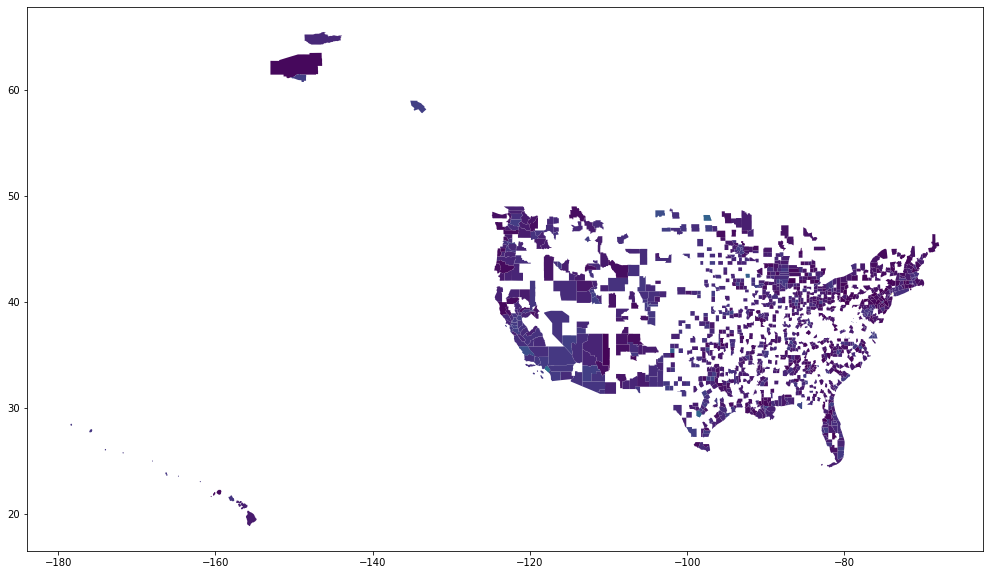

In [24]:
fig, ax = plt.subplots(figsize=(20,10))
counties_urban_gdf.plot(ax=ax, 
                        column='Percent Urban Population')

Next, we will loop through each individual state fips code present in the original counties geodataframe. Then, we will take a slice of the original and urban populated geodataframes to plot them on the state by state level:

In [26]:
cities_gdf

Name  Population STFIPS                     geometry
0                Ammon       15181     16  POINT (-111.95410 43.47579)
1            Blackfoot       11946     16  POINT (-112.34557 43.19394)
2           Boise City      225405     16  POINT (-116.23011 43.59901)
3               Burley       10727     16  POINT (-113.79329 42.53674)
4             Caldwell       53942     16  POINT (-116.68562 43.66163)
...                ...         ...    ...                          ...
3881           Herndon       23993     51   POINT (-77.38672 38.96993)
3882  Highland Springs       16618     51   POINT (-77.32854 37.55172)
3883           Hollins       15033     51   POINT (-79.95348 37.34338)
3884          Hopewell       22935     51   POINT (-77.29837 37.29038)
3885        Huntington       13120     51   POINT (-77.07409 38.79139)

[3886 rows x 4 columns]

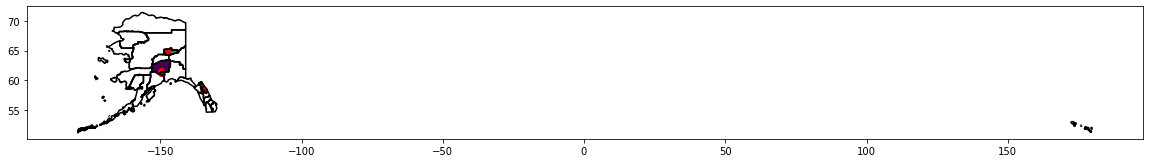

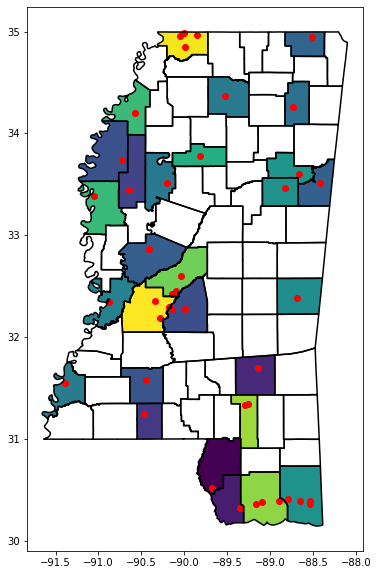

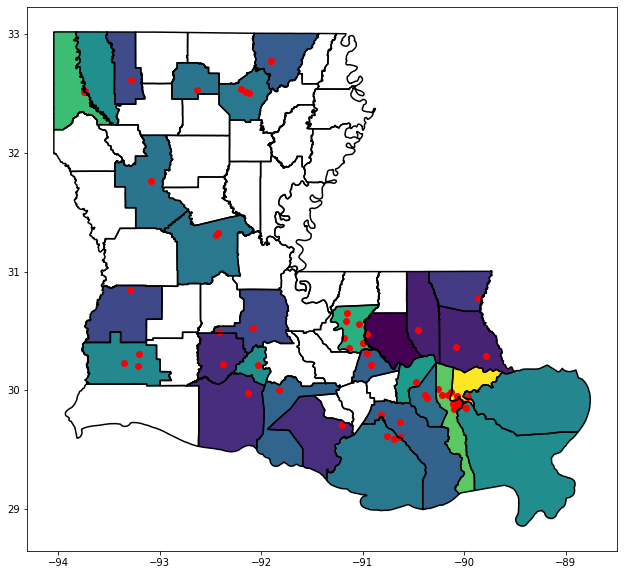

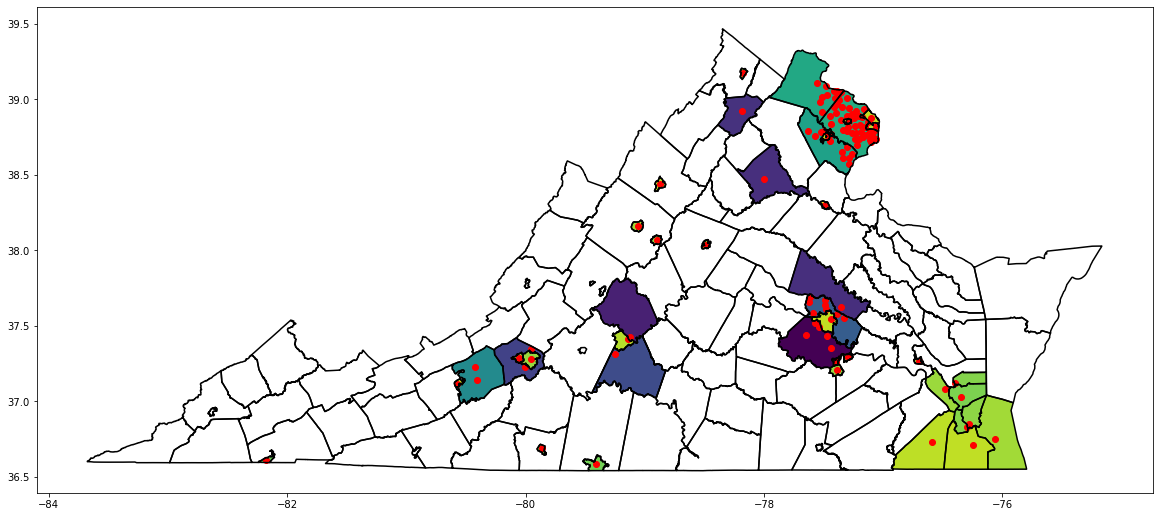

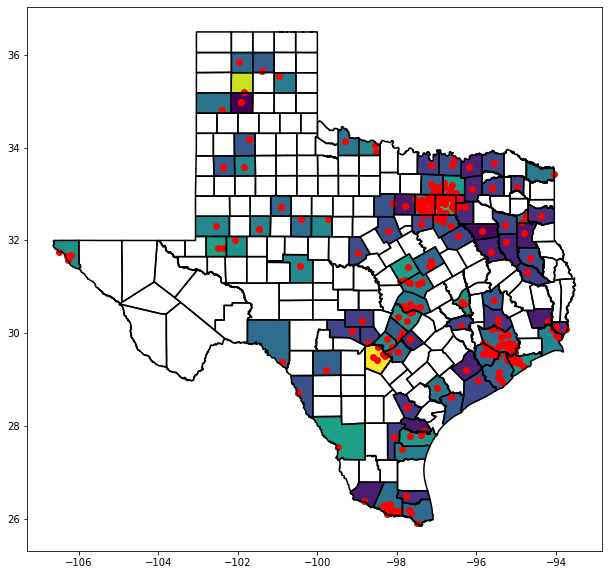

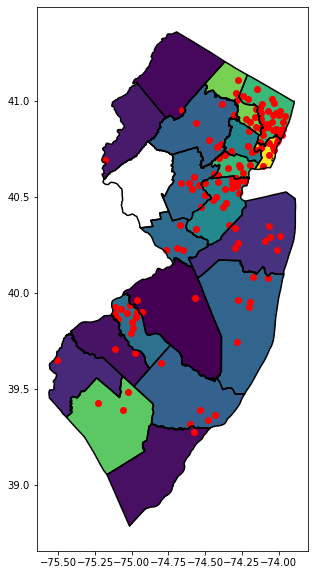

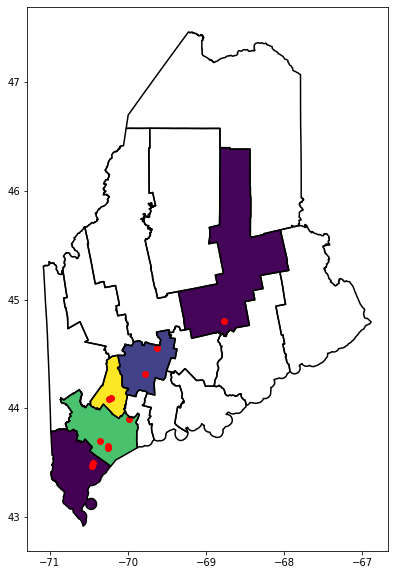

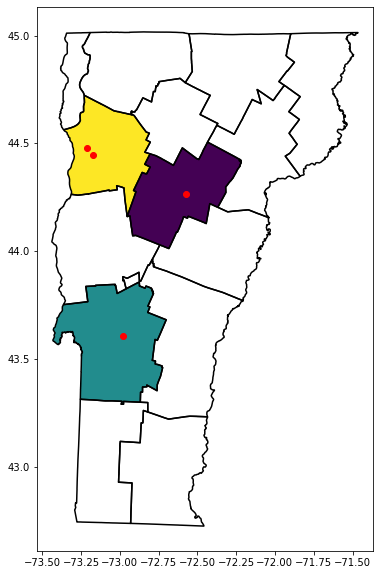

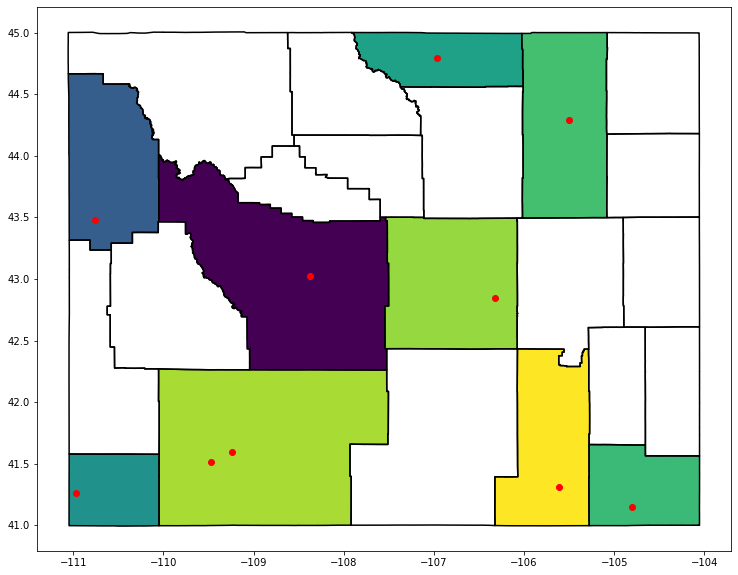

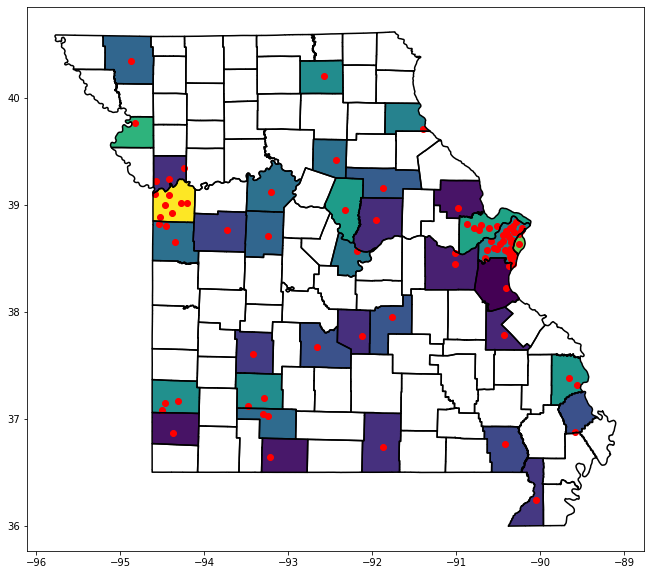

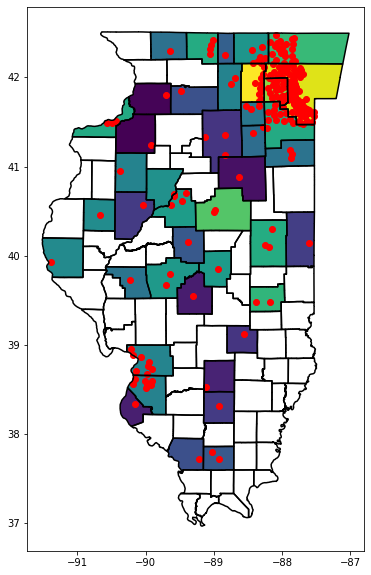

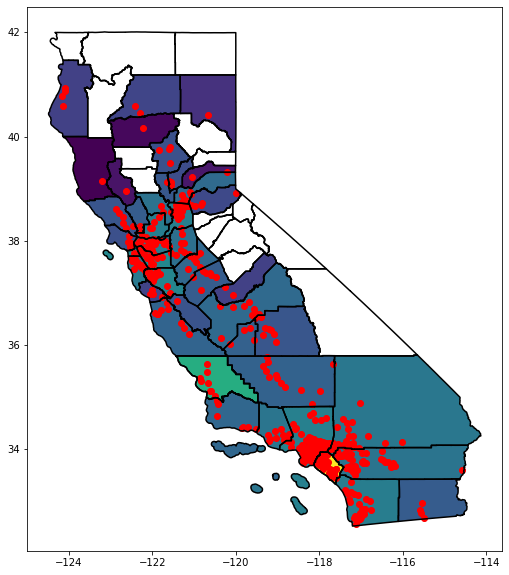

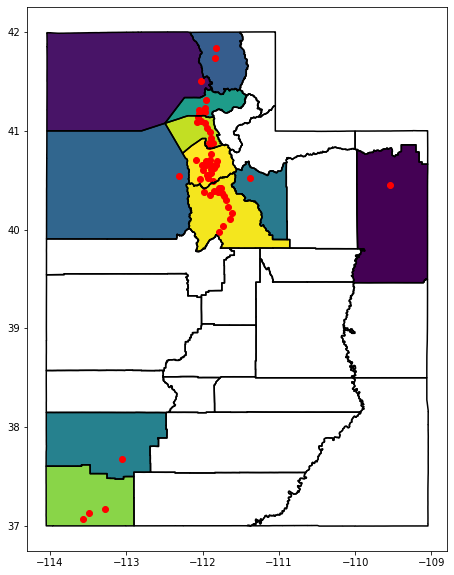

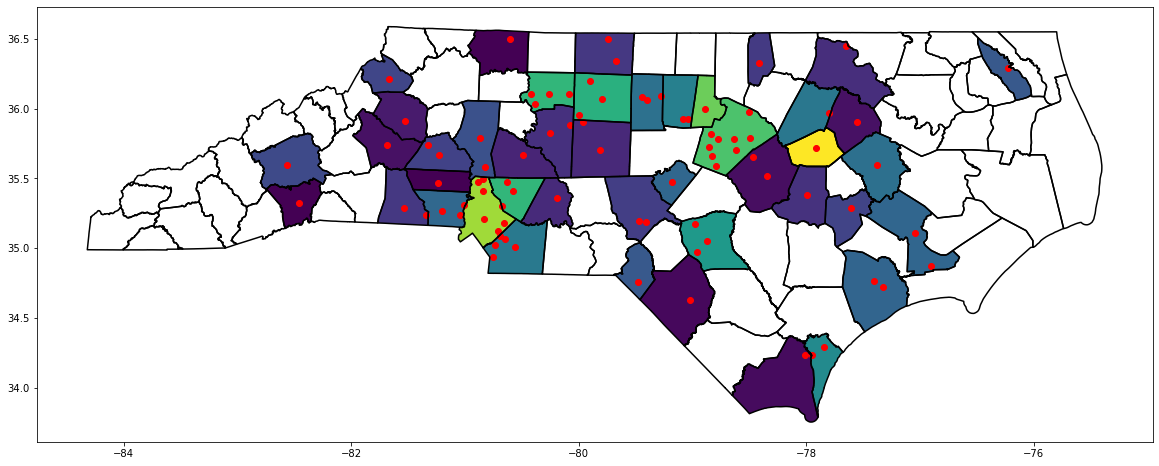

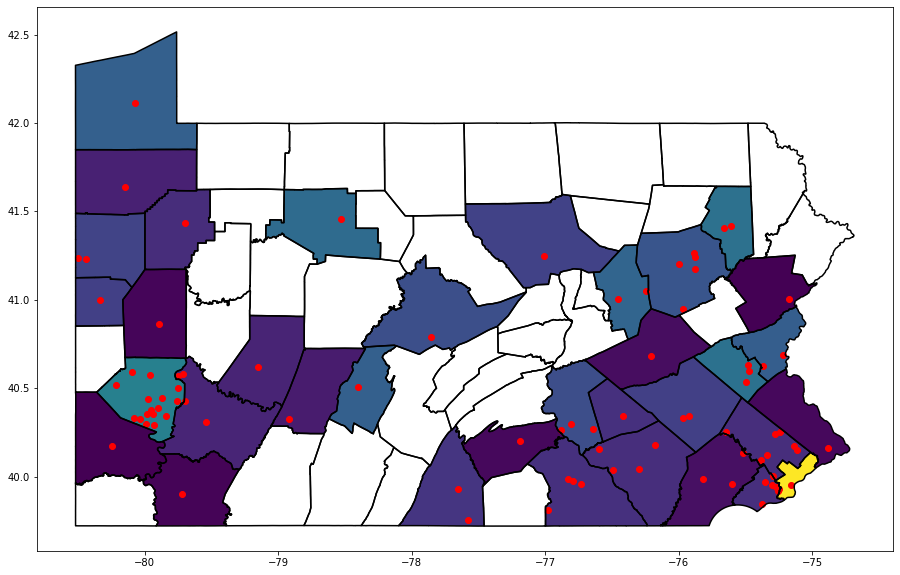

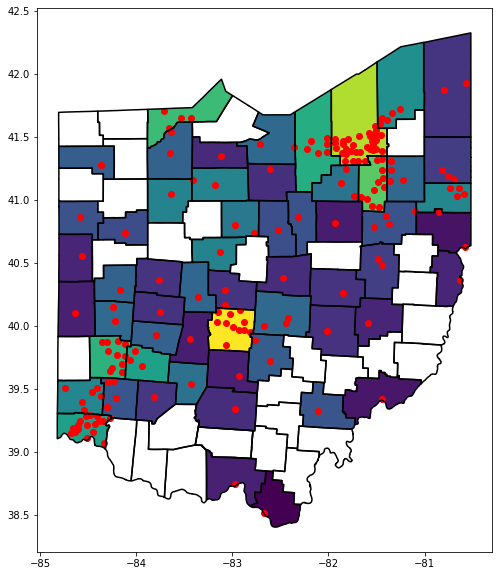

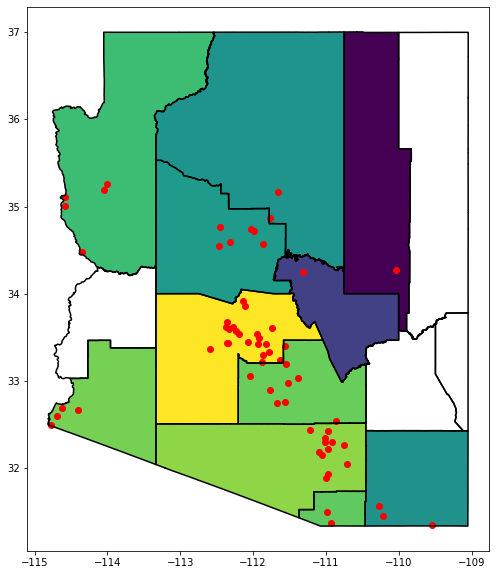

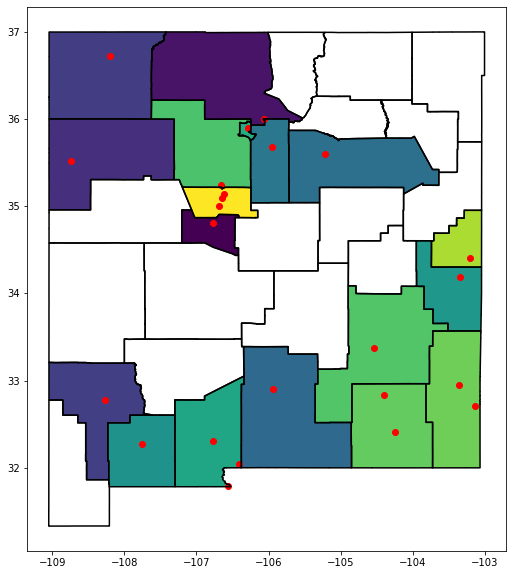

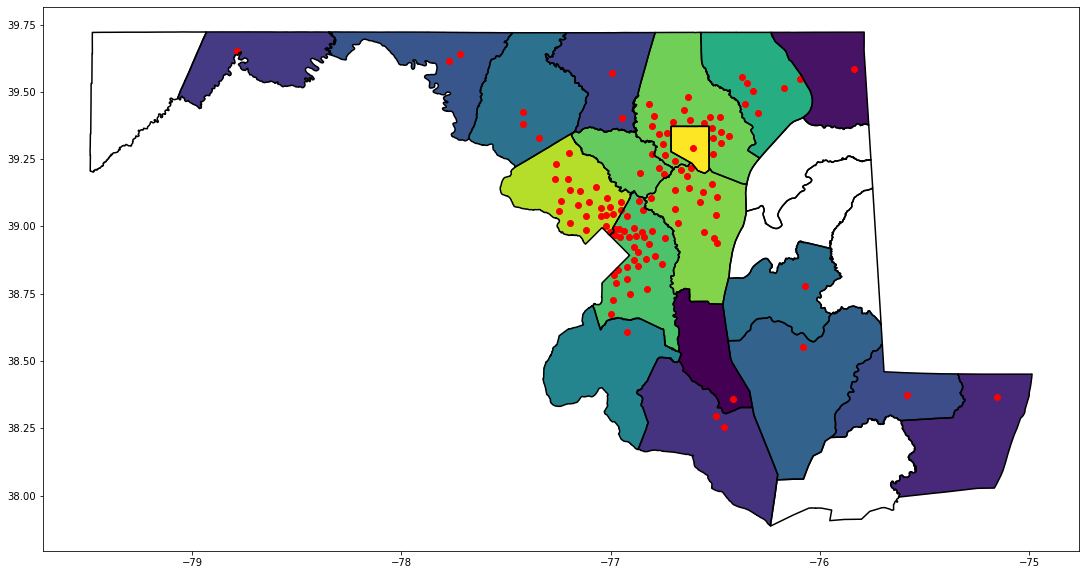

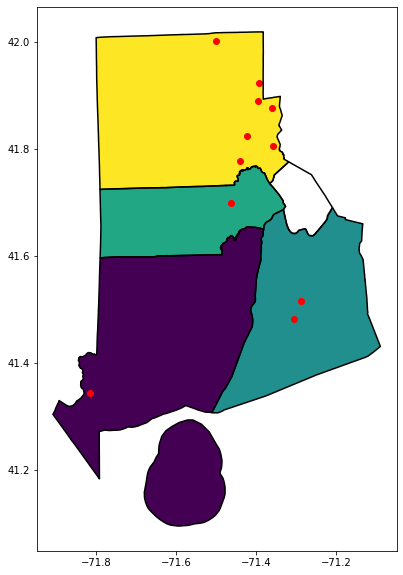

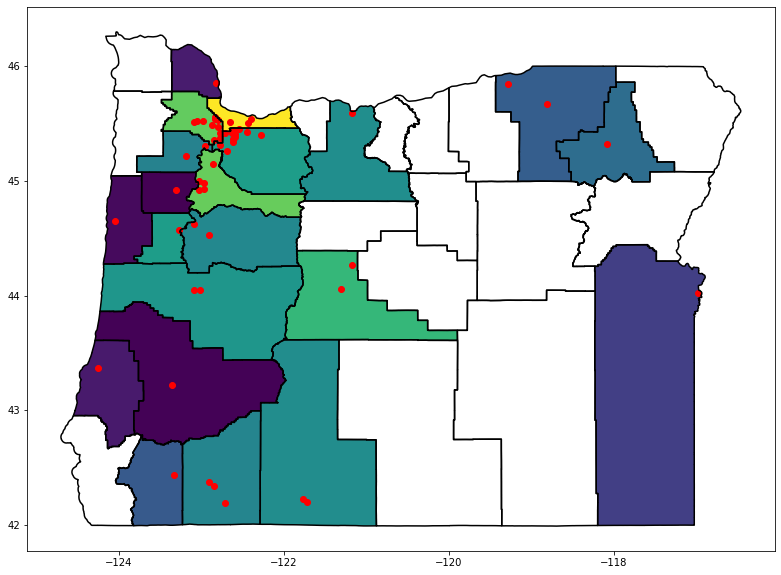

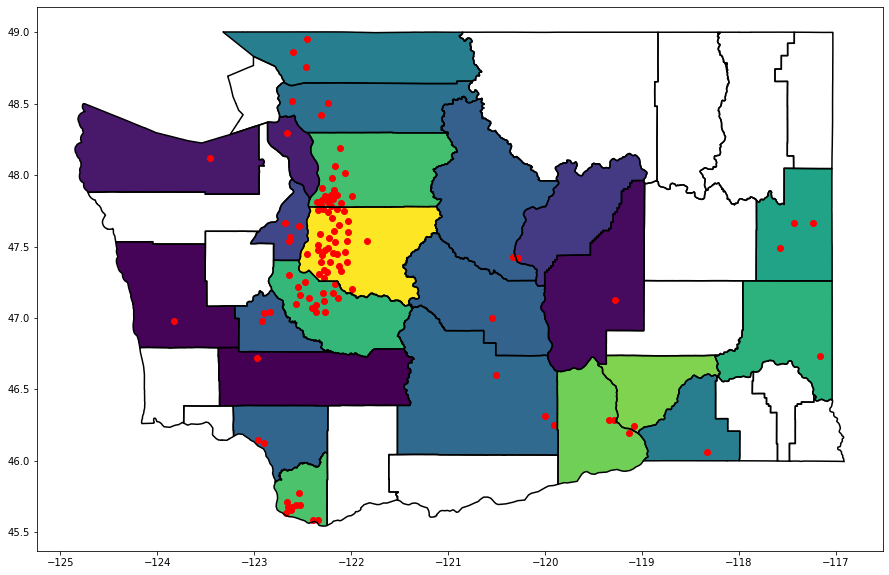

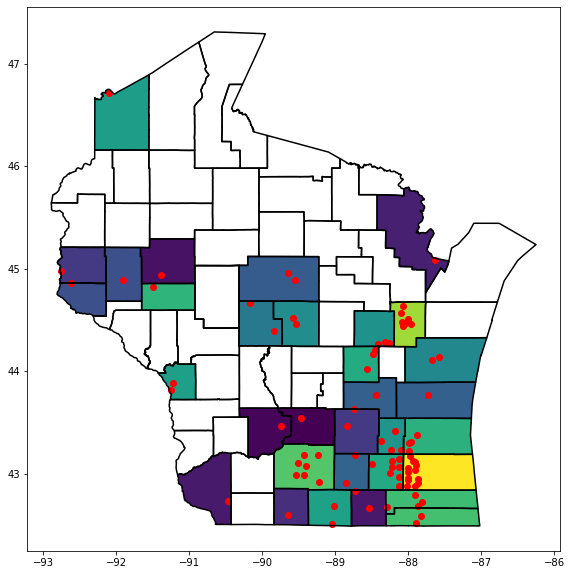

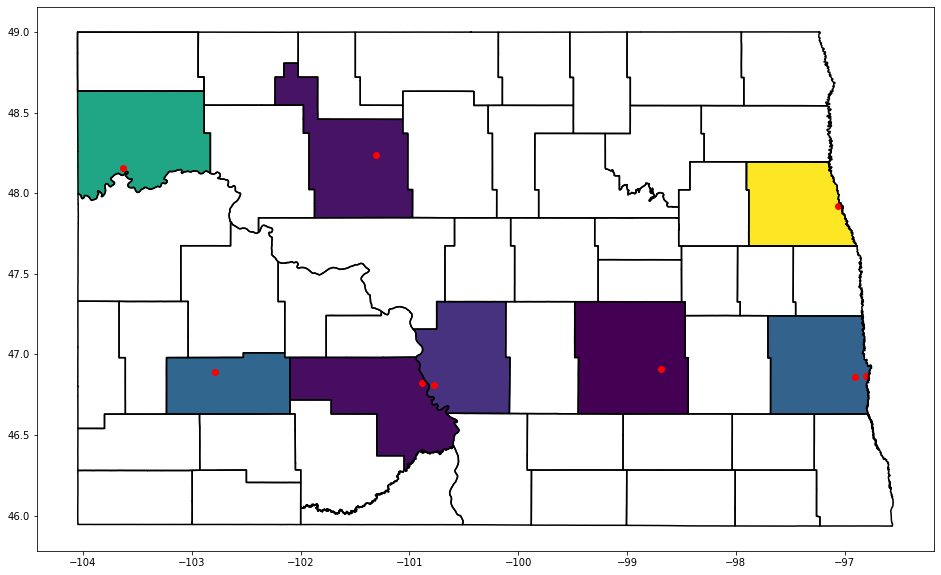

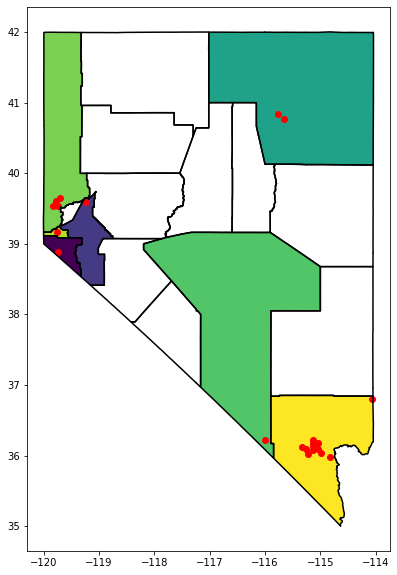

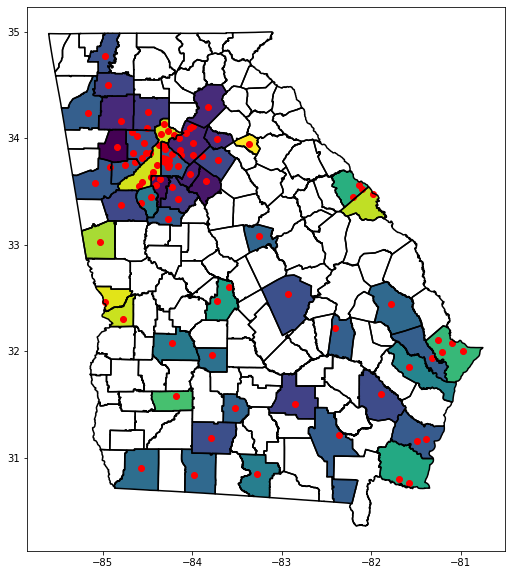

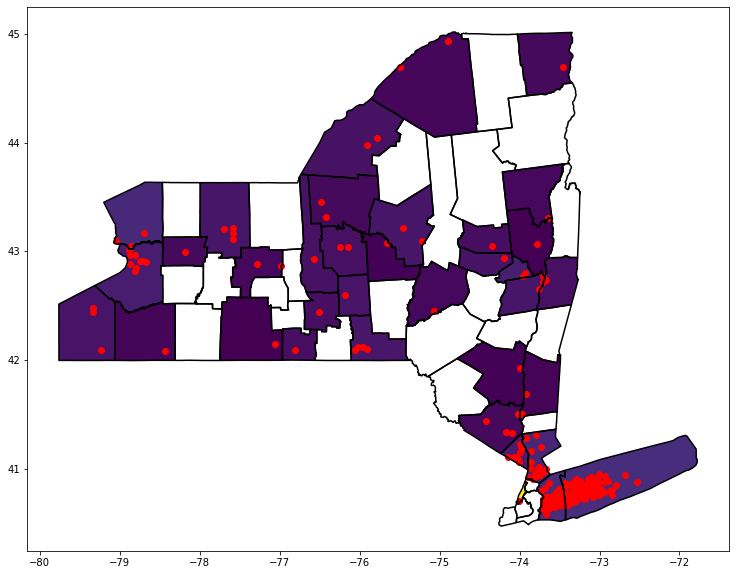

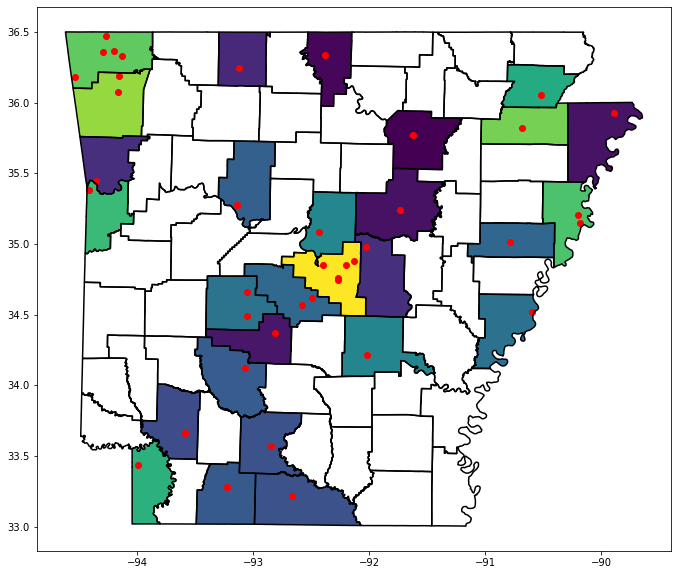

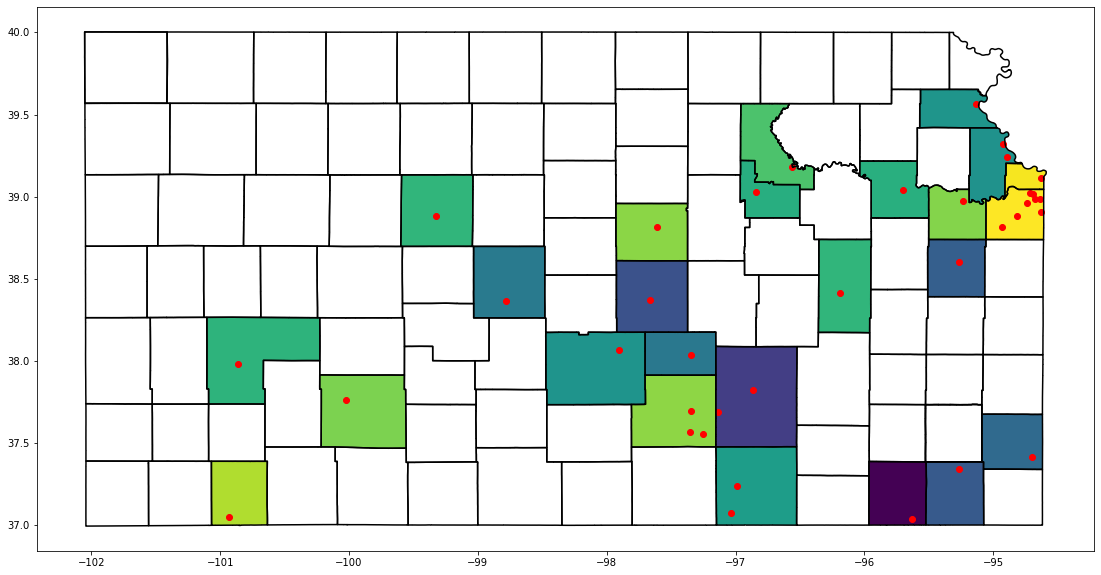

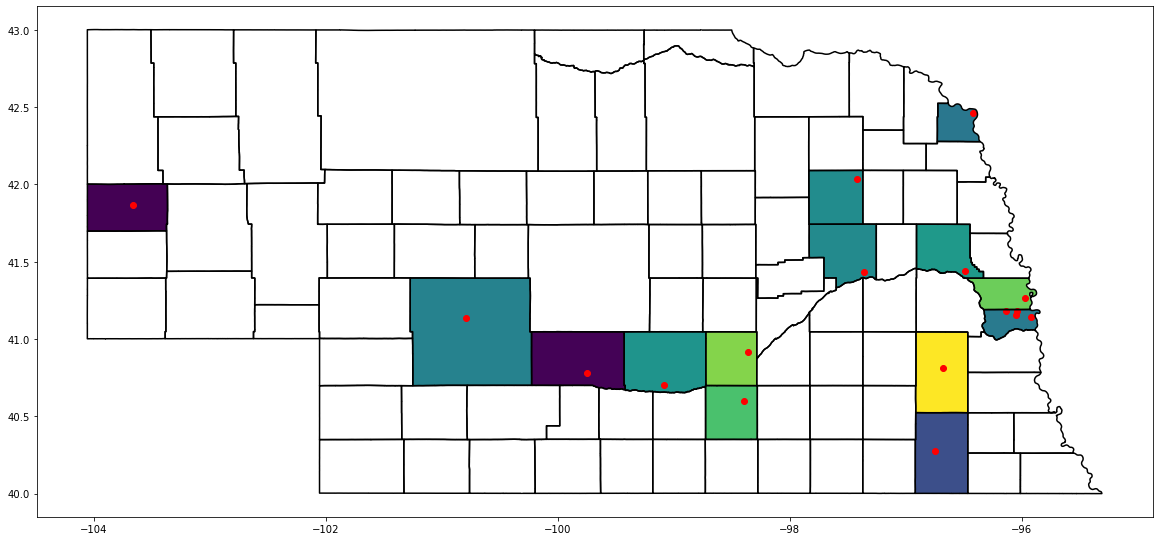

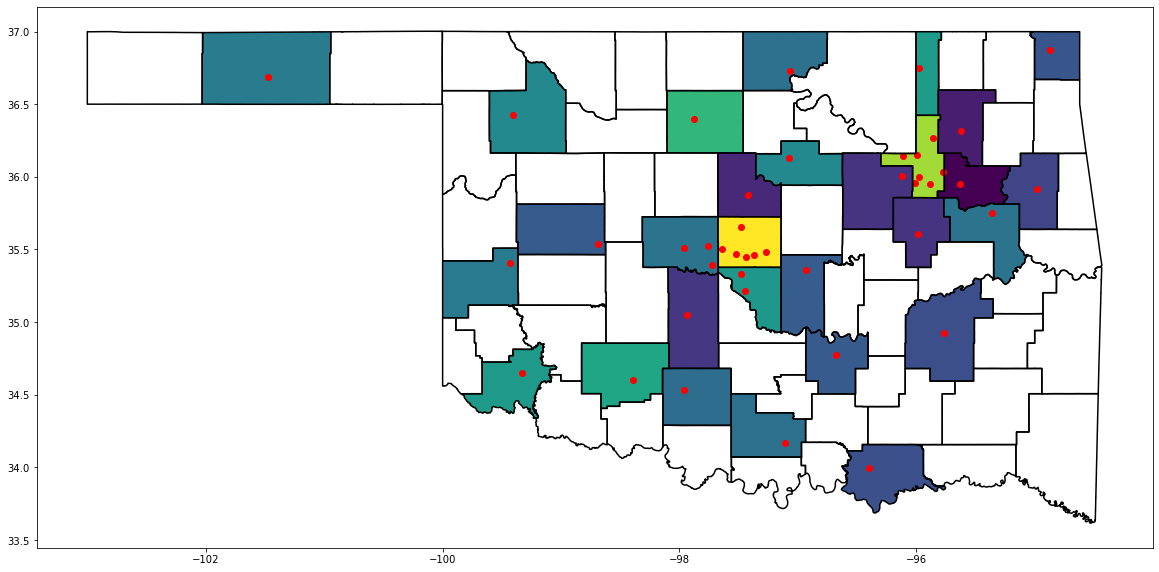

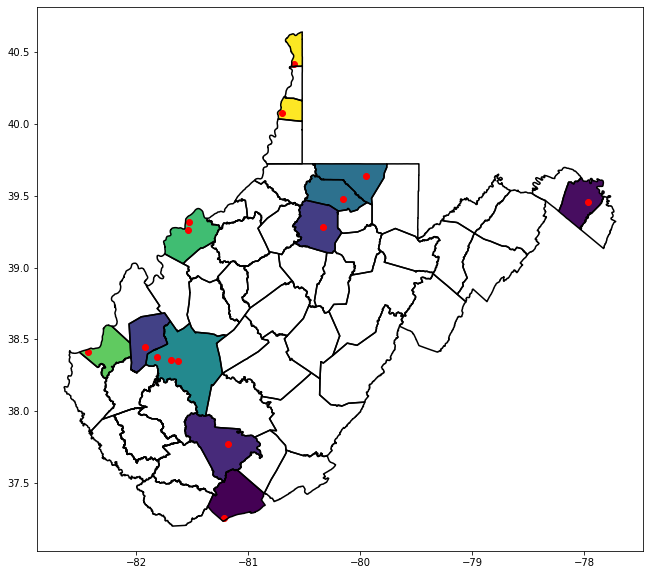

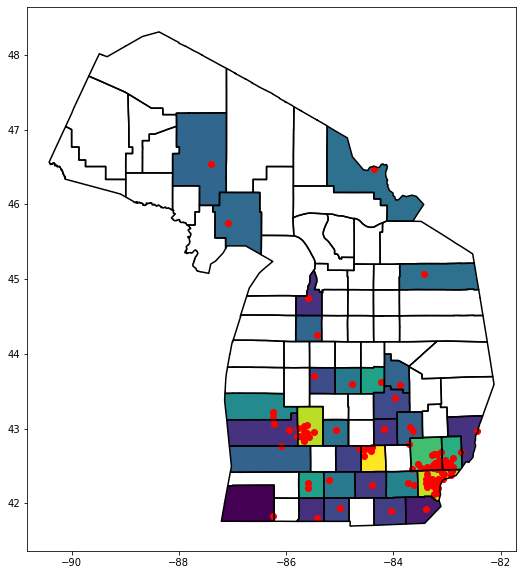

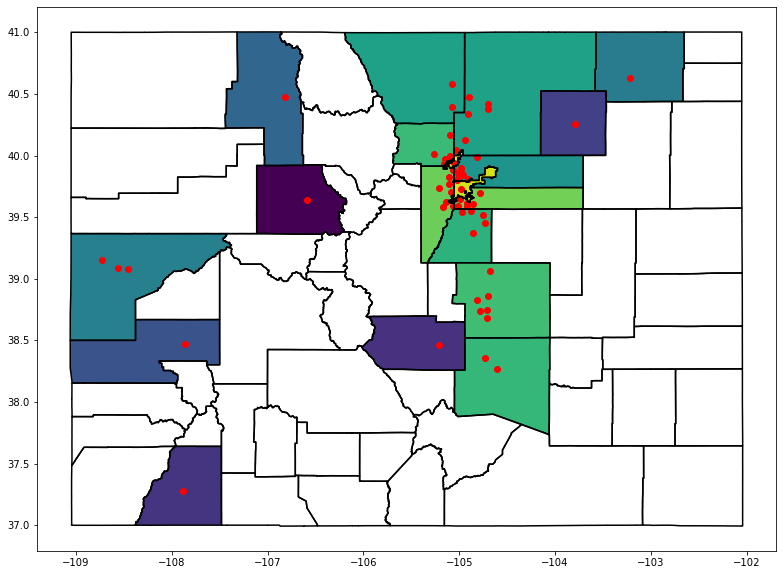

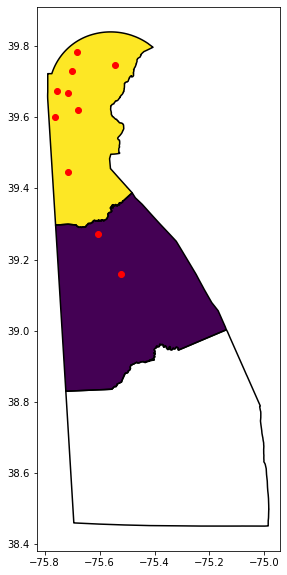

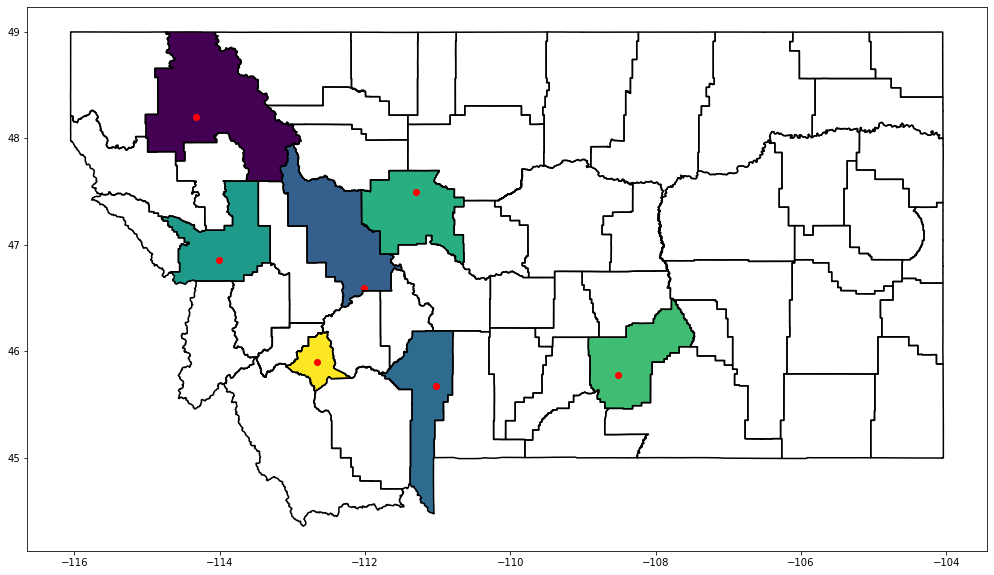

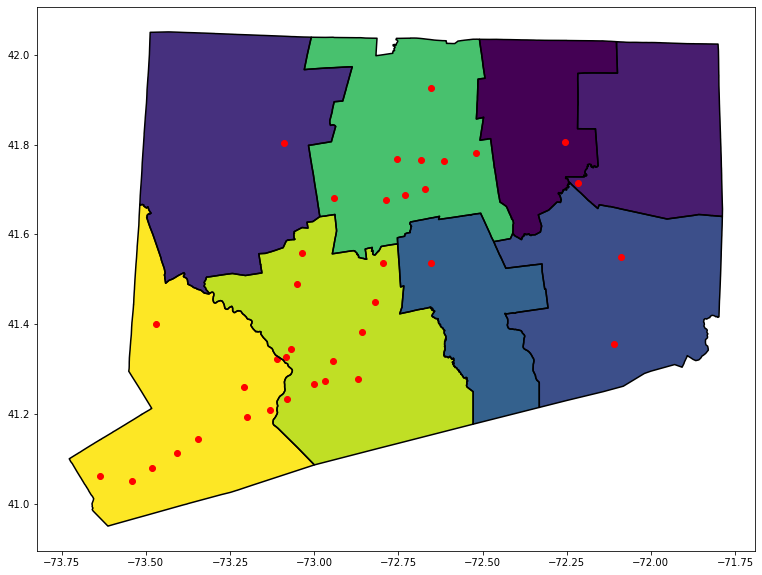

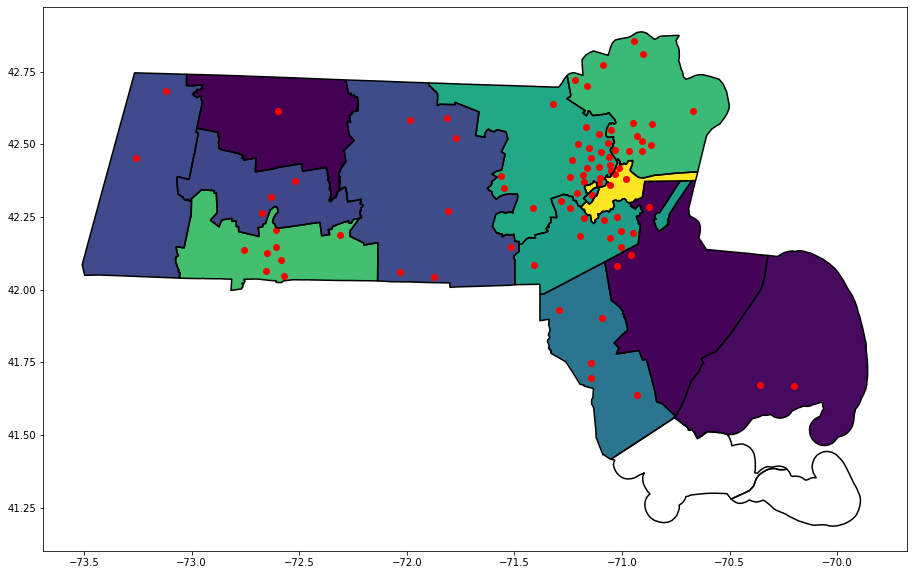

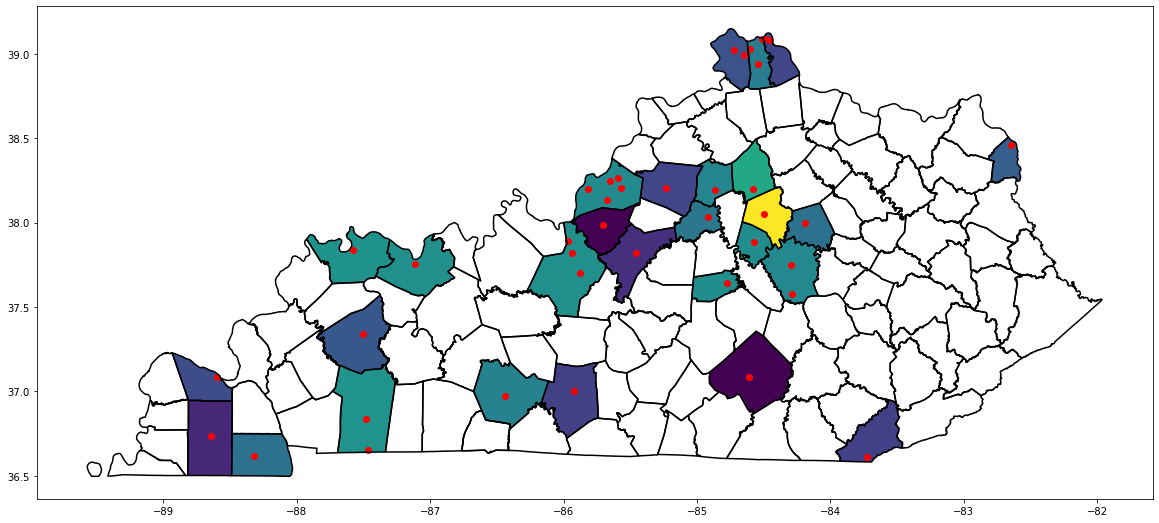

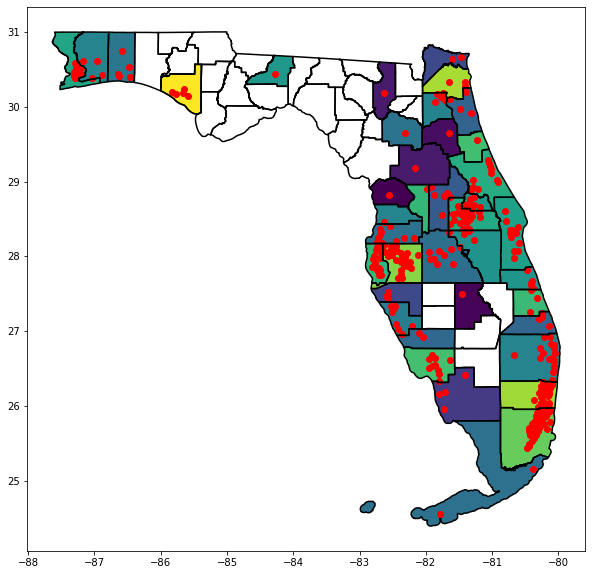

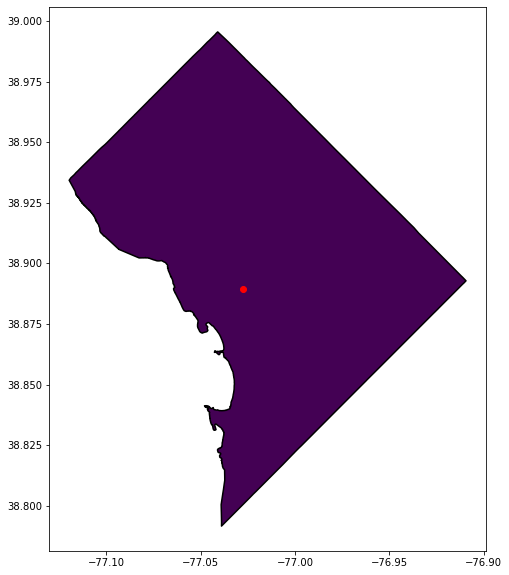

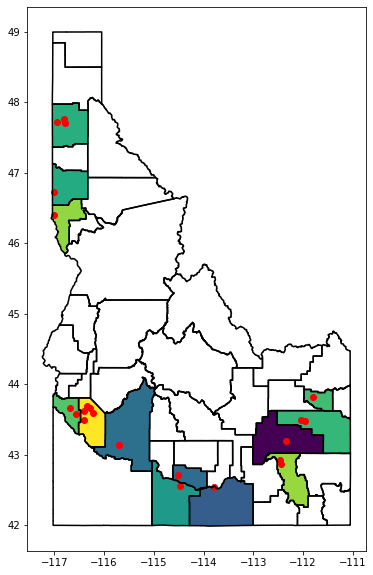

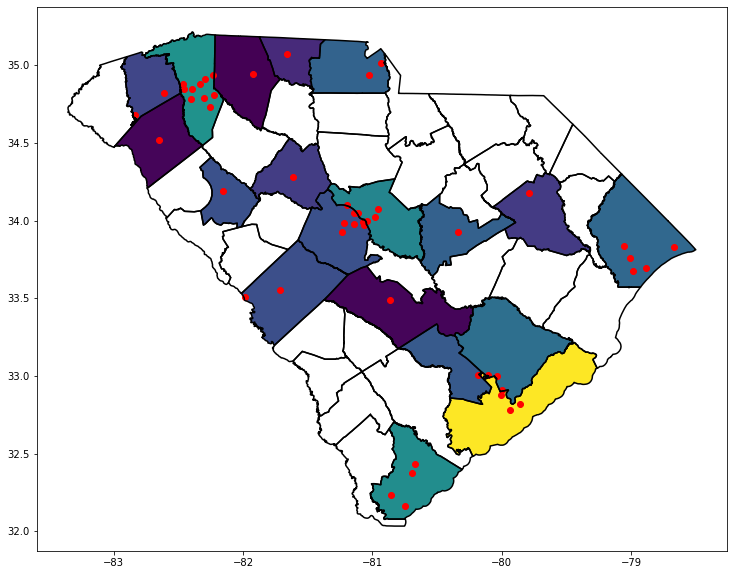

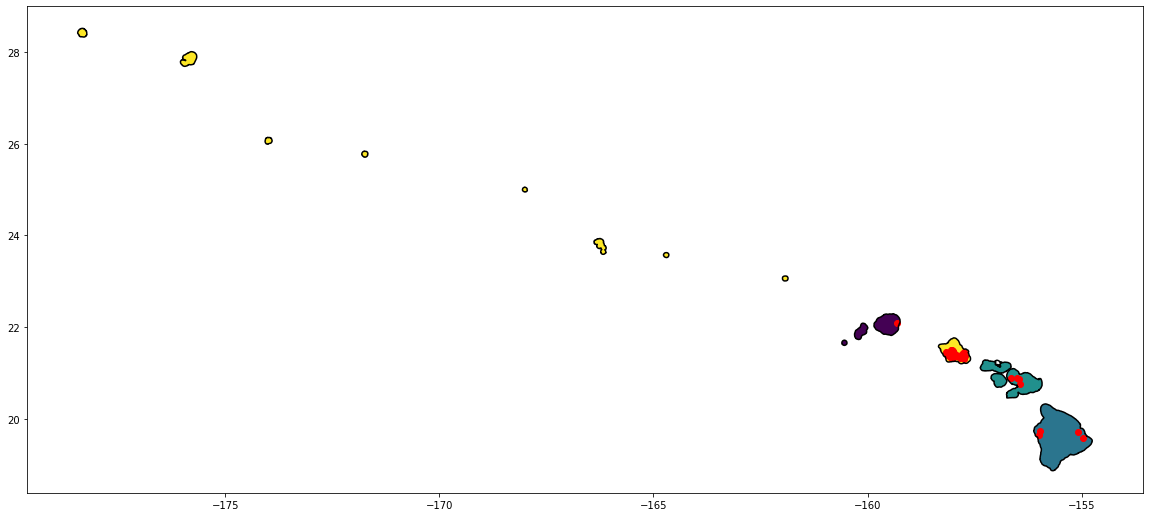

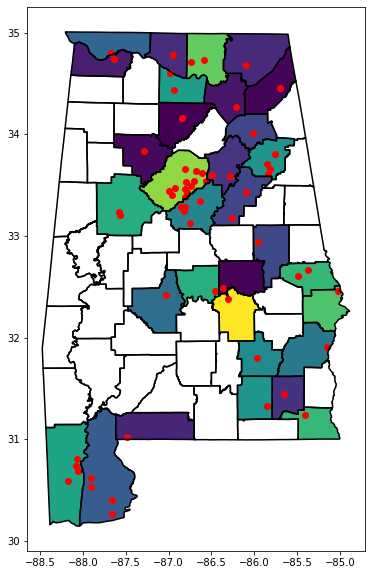

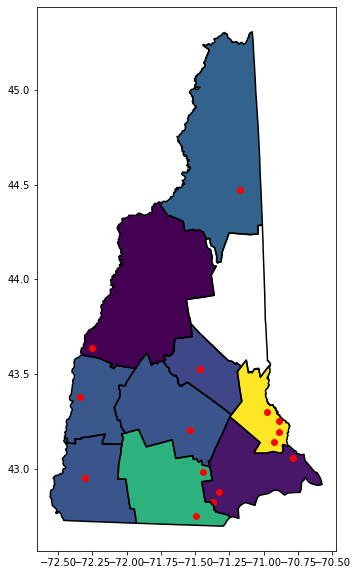

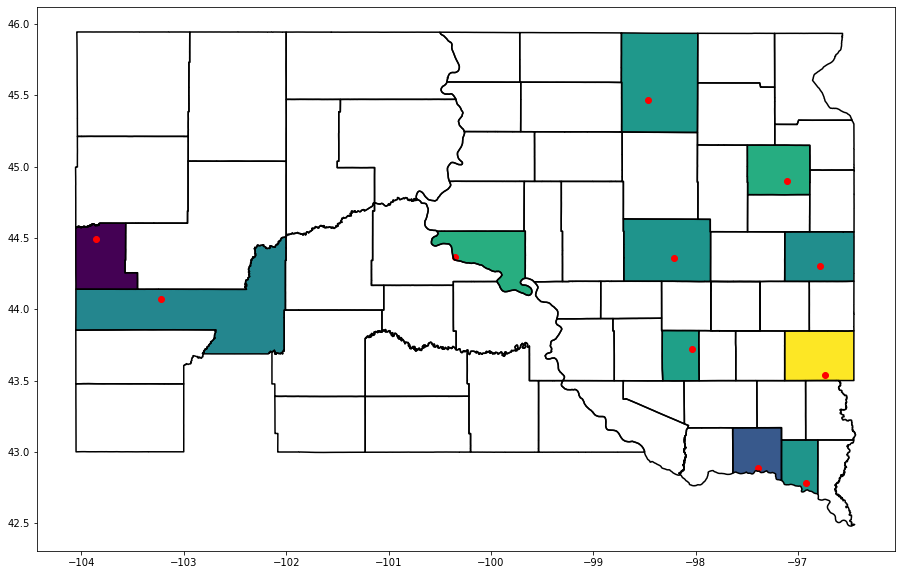

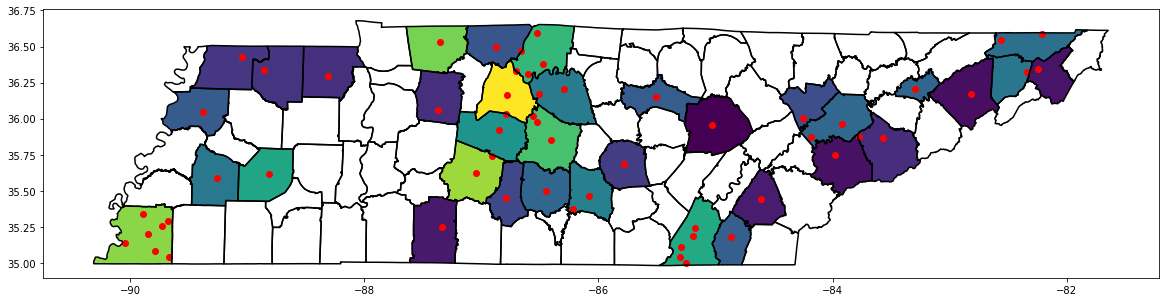

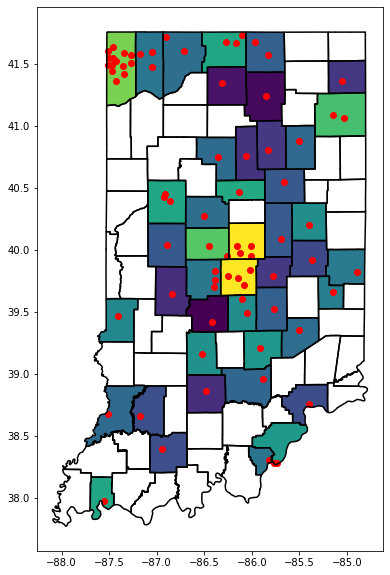

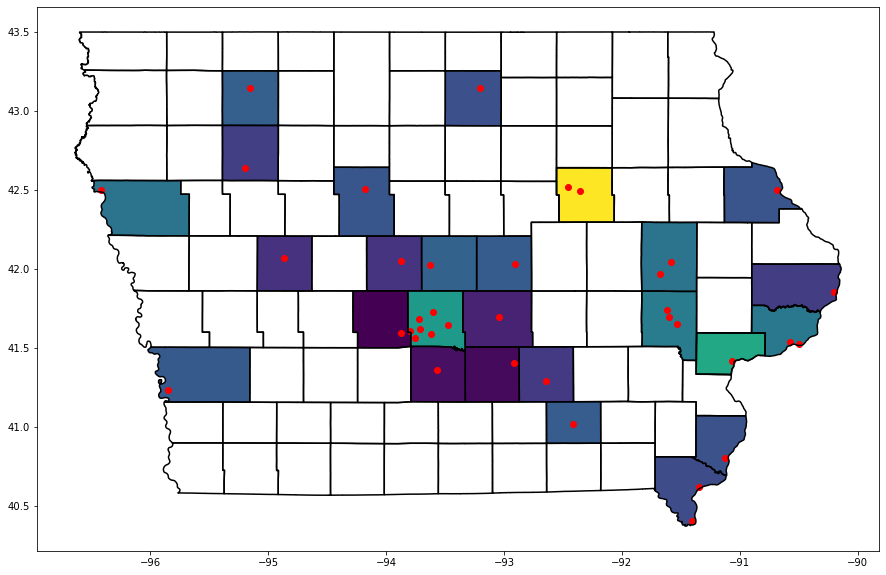

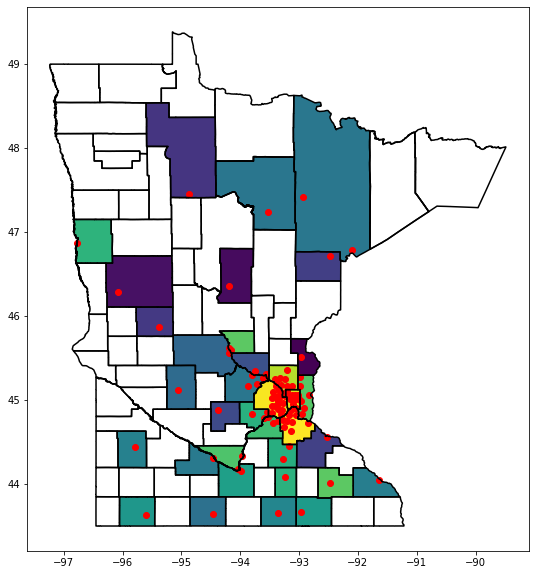

In [28]:
plt.rcParams.update({'figure.max_open_warning': 0})
for fips in counties_gdf['STATEFP'].unique():
    state_county_gdf = counties_gdf[counties_gdf['STATEFP']==fips]
    state_urban_county_gdf = counties_urban_gdf[counties_urban_gdf['STATEFP'] == fips]
    city_county_gdf = cities_gdf[cities_gdf['STFIPS'] == fips]
    
    fig, ax = plt.subplots(figsize=(20,10))
    
    xmin, ymin, xmax, ymax = state_county_gdf.total_bounds
    
    state_county_gdf.boundary.plot(ax=ax, 
                                   color=None, 
                                   edgecolor='k')
    state_urban_county_gdf.plot(column='Percent Urban Population', 
                                ax=ax)
    city_county_gdf.plot(ax=ax, 
                         color='r')